<a href="https://colab.research.google.com/github/RafsanJany-44/Machine-School/blob/main/K_fold_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Cross validation is used to determine the model perfence in variaous data sagments of a dataset and if the data set has not enough data.

*Checking over fitting



#Libraries

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#data = 'https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/HMC_WITH_BIOM.csv'
#data="https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv"
#data="https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/EEG_HMC.csv"
data="https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/REM_NREM_O2.csv"
dataset = pd.read_csv(data)


#Spliting

In [16]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


Models with out KFCV

**Logistic Regression,SVM,Random Forest**

In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
print("Logistic Reg Accuracy: ",lr.score(X_test, y_test))


svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print("SVM Accuracy: ",svm.score(X_test, y_test))

rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
print("Random Forest: ",rf.score(X_test, y_test))


Logistic Reg Accuracy:  0.843105911162506
SVM Accuracy:  0.9193932385552003
Random Forest:  0.9233045371063193


<h2 style='color:purple'>KFold cross validation</h2>

**Basic example**

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


**Mannualy Function**

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)


from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

print("Logistic Reg Accuracy: ",scores_logistic)
print("SVN Accuracy: ",scores_svm)
print("RF Accuracy: ",scores_rf)

Logistic Reg Accuracy:  [0.8151789622546214, 0.8417455133169467, 0.8295844838036232]
SVN Accuracy:  [0.8182767096535237, 0.8043368463584633, 0.8088086739847801]
RF Accuracy:  [0.8384120677463888, 0.8626889794269167, 0.8474644757222709]


<h2>Cross_val_score function</h2>

In [17]:
from sklearn.model_selection import cross_val_score

**Logistic regression, SVM, Random forest using cross val score**

In [ ]:
start = time.time()
Lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=5)
Rfc=cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=5)
#svm=cross_val_score(SVC(gamma='auto'), X, y,cv=5)

print("Logistic regression Accurecy",Lr)
print("AVG: ",sum(Lr)/len(Lr))
print("------------------")
print("Random Forest Performance Accurecy for",Rfc)
print("AVG: ",sum(Rfc)/len(Rfc))
#print("SVM Accurecy for 3 fold:",svm)
print("Ex Time: ",time.time() - start)

Logistic regression Accurecy [0.81228956 0.81244739 0.81098827 0.80251417 0.81166171]
AVG:  0.809980220107051
------------------
Random Forest Performance Accurecy for [0.81200898 0.82383972 0.81317695 0.82827319 0.79168303]
AVG:  0.8137963745554894
Ex Time:  73.76158452033997


**RepeatedStratifiedKFold**

In [ ]:
start = time.time()
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)


Lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=cv)
Rfc=cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=cv)
#svm=cross_val_score(SVC(gamma='auto'), X, y,cv=5)

print("Logistic regression Accurecy",Lr)
print("AVG: ",sum(Lr)/len(Lr))
print("------------------")
print("Random Forest Performance Accurecy for",Rfc)
print("AVG: ",sum(Rfc)/len(Rfc))
#print("SVM Accurecy for 3 fold:",svm)
print("Ex Time: ",time.time() - start)

Logistic regression Accurecy [0.8117284  0.81154947 0.81115663 0.81143723 0.81121275 0.81049383
 0.81087603 0.81138111 0.81261575 0.81188619 0.81144781 0.81048319
 0.81211067 0.81115663 0.81194231]
AVG:  0.8114318660978594
------------------
Random Forest Performance Accurecy for [0.89085297 0.88865817 0.89337224 0.89163253 0.89286716 0.89096521
 0.89236209 0.88961221 0.88983669 0.89152029 0.89248036 0.89191313
 0.89006117 0.89022953 0.88776026]
AVG:  0.8909416005442093
Ex Time:  219.7541573047638


<h2 style='color:purple'>CV Parameter tunning</h2>

In [ ]:


Kfolds=20
Kfolds_range = range (2,Kfolds+1)
scores={}
scores_list = []
for k in Kfolds_range:
  l=list(cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=k))
  avg=sum(l)/k
  scores[k] = avg
  scores_list.append(avg)
  print(str(k)+"/"+str(Kfolds)+" round completed.........................AVG Accurecy: "+str(avg))

2/20 round completed.........................AVG Accurecy: 0.8030102361497711
3/20 round completed.........................AVG Accurecy: 0.815502269180219
4/20 round completed.........................AVG Accurecy: 0.8161421388165574
5/20 round completed.........................AVG Accurecy: 0.8132014925744466
6/20 round completed.........................AVG Accurecy: 0.8152330051436615
7/20 round completed.........................AVG Accurecy: 0.8135831013737992
8/20 round completed.........................AVG Accurecy: 0.8179042830205621
9/20 round completed.........................AVG Accurecy: 0.8151092657615203
10/20 round completed.........................AVG Accurecy: 0.8118880842699454
11/20 round completed.........................AVG Accurecy: 0.8151429746560833
12/20 round completed.........................AVG Accurecy: 0.8151989558540383
13/20 round completed.........................AVG Accurecy: 0.8139642543205786
14/20 round completed.........................AVG Accurecy: 0

In [ ]:

print("The best number of Folds:")
print(list(scores.keys())[scores_list.index(max(scores_list))])

The best number of Folds:
8


Text(0, 0.5, 'AVG Accuracy')

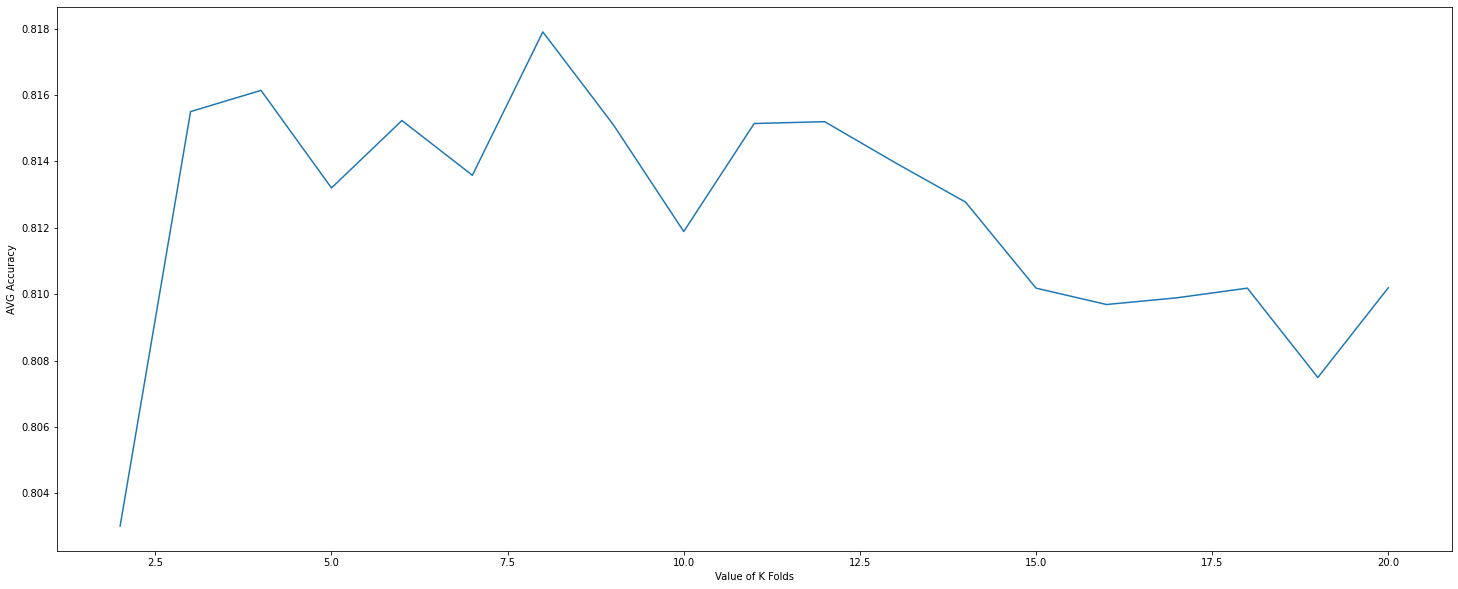

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(Kfolds_range,scores_list)
plt.xlabel('Value of K Folds')
plt.ylabel ('AVG Accuracy')

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    x = Kfolds_range,
    y = scores_list
))

fig = px.line(df, x="x", y="y", title="K Folds AVG Accuracy") 
fig.show()

<h2 style='color:purple'>CV Parameter tunning With RepeatedStratifiedKFold</h2> (N Split tunning)

In [ ]:
start = time.time()
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
Kfolds=20
Kfolds_range = range (2,Kfolds+1)
scores={}
loop_time=[]
scores_list = []
for k in Kfolds_range:
  loop_start=time.time()
  cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=3, random_state=1)
  l=list(cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X, y,cv=cv))
  avg=sum(l)/len(l)
  scores[k] = avg
  scores_list.append(avg)
  print(str(k)+"/"+str(Kfolds)+" round completed.........................AVG Accurecy: "+str(avg))
  t=time.time()-loop_start
  loop_time.append(t)
  print("Loop Time:",t,"sec")

print("Ex Time: ",time.time() - start)

2/20 round completed.........................AVG Accurecy: 0.8115029481308552
Loop Time: 27.99870252609253 sec
3/20 round completed.........................AVG Accurecy: 0.8114505712577808
Loop Time: 40.94498419761658 sec
4/20 round completed.........................AVG Accurecy: 0.811487982999611
Loop Time: 59.56912088394165 sec
5/20 round completed.........................AVG Accurecy: 0.8114318660978594
Loop Time: 79.9105007648468 sec
6/20 round completed.........................AVG Accurecy: 0.8113009211043497
Loop Time: 109.47780299186707 sec
7/20 round completed.........................AVG Accurecy: 0.81134207296998
Loop Time: 135.25058102607727 sec
8/20 round completed.........................AVG Accurecy: 0.8113757445152795
Loop Time: 159.14991092681885 sec
9/20 round completed.........................AVG Accurecy: 0.8113383380145456
Loop Time: 176.53181433677673 sec
10/20 round completed.........................AVG Accurecy: 0.8113458254403116
Loop Time: 189.57235836982727 sec

In [ ]:

print("The best number")
print(list(scores.keys())[scores_list.index(max(scores_list))])

The best number of Folds:
2


Text(0, 0.5, 'AVG Accuracy')

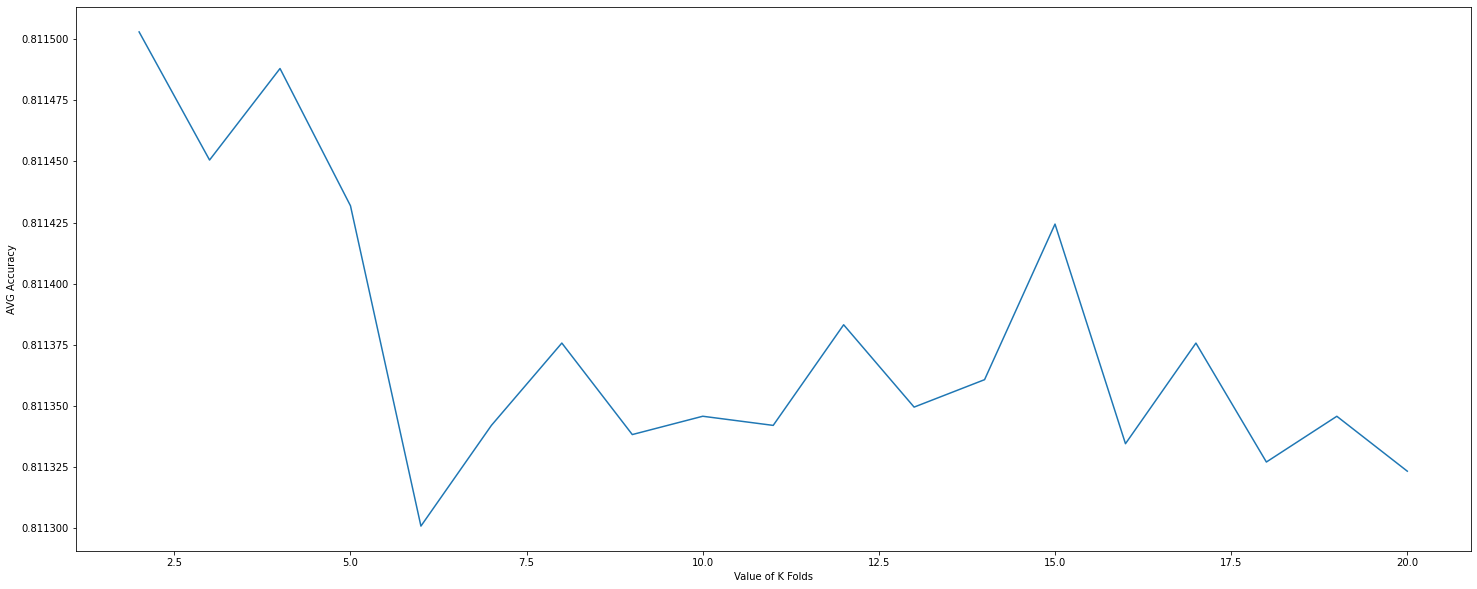

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(Kfolds_range,scores_list)
plt.xlabel('Value of K Folds')
plt.ylabel ('AVG Accuracy')

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    x = Kfolds_range,
    y = scores_list
))

fig = px.line(df, x="x", y="y", title="AVG Accuracy") 
fig.show()

<h2 style='color:purple'>CV Parameter tunning With RepeatedStratifiedKFold</h2> (N Repeats tunning)

In [18]:
start = time.time()
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
Kfolds=20
Kfolds_range = range (2,Kfolds+1)
scores={}
loop_time=[]
scores_list = []
for k in Kfolds_range:
  loop_start=time.time()
  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=k, random_state=1)
  l=list(cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X, y,cv=cv))
  avg=sum(l)/len(l)
  scores[k] = avg
  scores_list.append(avg)
  print(str(k)+"/"+str(Kfolds)+" round completed.........................AVG Accurecy: "+str(avg))
  t=time.time()-loop_start
  loop_time.append(t)
  print("Loop Time:",t,"sec")

print("Ex Time: ",time.time() - start)

2/20 round completed.........................AVG Accurecy: 0.8114730197105097
Loop Time: 30.229072093963623 sec
3/20 round completed.........................AVG Accurecy: 0.8114505712577808
Loop Time: 38.668997287750244 sec
4/20 round completed.........................AVG Accurecy: 0.8114646027690041
Loop Time: 57.864776849746704 sec
5/20 round completed.........................AVG Accurecy: 0.8114595520750008
Loop Time: 67.76110172271729 sec
6/20 round completed.........................AVG Accurecy: 0.8114599258085566
Loop Time: 87.18830013275146 sec
7/20 round completed.........................AVG Accurecy: 0.8114409532278083
Loop Time: 99.42934012413025 sec
8/20 round completed.........................AVG Accurecy: 0.8114435580531866
Loop Time: 113.14700961112976 sec
9/20 round completed.........................AVG Accurecy: 0.8114480778530911
Loop Time: 120.43977284431458 sec
10/20 round completed.........................AVG Accurecy: 0.8114427155842827
Loop Time: 139.3208594322204

In [19]:
print("The best number")
print(list(scores.keys())[scores_list.index(max(scores_list))])

The best number
2


In [20]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    x = Kfolds_range,
    y = scores_list
))

fig = px.line(df, x="x", y="y", title="AVG Accuracy") 
fig.show()